In [66]:
import csv
%matplotlib inline

file = open('exoplanet.eu_catalog.csv')
dictReader = csv.DictReader(file)

WASP_dictionary = {}
for row in dictReader:
    if 'WASP-' in row['# name'] and row['detection_type'] == 'Primary Transit':
        WASP_dictionary.update({row['# name']: row})

WASP_dictionary.keys()

dict_keys(['WASP-1 b', 'WASP-10 b', 'WASP-100 b', 'WASP-101 b', 'WASP-102 b', 'WASP-103 b', 'WASP-104 b', 'WASP-105 b', 'WASP-106 b', 'WASP-107 b', 'WASP-108 b', 'WASP-109 b', 'WASP-110 b', 'WASP-111 b', 'WASP-112 b', 'WASP-113 b', 'WASP-114 b', 'WASP-117 b', 'WASP-118 b', 'WASP-119 b', 'WASP-12 b', 'WASP-120 b', 'WASP-121 b', 'WASP-122 b', 'WASP-123 b', 'WASP-124 b', 'WASP-126 b', 'WASP-127 b', 'WASP-128 b', 'WASP-129 b', 'WASP-13 b', 'WASP-130 b', 'WASP-131 b', 'WASP-132 b', 'WASP-132 c', 'WASP-133 b', 'WASP-134 b', 'WASP-135 b', 'WASP-136 b', 'WASP-137 b', 'WASP-138 b', 'WASP-139 b', 'WASP-14 b', 'WASP-140 b', 'WASP-141 b', 'WASP-142 b', 'WASP-143 b', 'WASP-144 b', 'WASP-145 A b', 'WASP-146 b', 'WASP-147 b', 'WASP-148 b', 'WASP-15 b', 'WASP-150 b', 'WASP-151 b', 'WASP-153 b', 'WASP-156 b', 'WASP-157 b', 'WASP-158 b', 'WASP-159 b', 'WASP-16 b', 'WASP-160 B b', 'WASP-161 b', 'WASP-162 b', 'WASP-163 b', 'WASP-164 b', 'WASP-165 b', 'WASP-166 b', 'WASP-167 b', 'WASP-168 b', 'WASP-169 b',

In [67]:
import warnings
warnings.filterwarnings('ignore')
import eleanor
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk

plt.rcParams['font.size'] = 16

period_dict = {}
for key in WASP_dictionary:
    try:
        star = eleanor.Source(name=key, sector='recent')
        data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')

        print(key)
    except:
        continue
    else:
        lc = data.to_lightkurve()
        lc = lc.normalize().flatten(window_length=901).remove_outliers()

        period = np.linspace(1, 20, 10000)

        bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)

        planet_b_period = bls.period_at_max_power
        # planet_b_t0 = bls.transit_time_at_max_power
        # planet_b_dur = bls.duration_at_max_power
        #
        # ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
        # ax.set_xlim(-1, 1)

        period_dict.update({key : planet_b_period})

No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-1 b
No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-100 b
No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-101 b
No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-104 b
No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-105 b
No eleanor postcard has been made for your target (yet). Using TessCut instead.
WASP-106 b
INFO: Found cached file ./mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0010-1-4-cal-1196-0052_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0010-1-4-cal-1196-0052_tess_v2_bkg.fits with expected size 74583360. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_eleanor_tess_ffi_postcard-s0010-1-4-cal-1196-0052_tess_v2_pc\hlsp_eleanor_tess_ffi_postcard-s0010-1-4-cal-1196-0052_tess_v2_pc.fits with expected size 149273280. [astroquery.que

In [68]:
print(period_dict)
file.close()

{'WASP-1 b': <Quantity 2.51635164 d>, 'WASP-100 b': <Quantity 2.85078508 d>, 'WASP-101 b': <Quantity 3.7419742 d>, 'WASP-104 b': <Quantity 13.7179718 d>, 'WASP-105 b': <Quantity 7.8729873 d>, 'WASP-106 b': <Quantity 18.58245825 d>, 'WASP-107 b': <Quantity 14.17021702 d>, 'WASP-108 b': <Quantity 13.56975698 d>, 'WASP-110 b': <Quantity 17.72927293 d>, 'WASP-111 b': <Quantity 2.31113111 d>, 'WASP-112 b': <Quantity 3.03510351 d>, 'WASP-113 b': <Quantity 4.5419542 d>, 'WASP-117 b': <Quantity 14.86188619 d>, 'WASP-118 b': <Quantity 4.0460046 d>, 'WASP-119 b': <Quantity 2.49924992 d>, 'WASP-12 b': <Quantity 1.09120912 d>, 'WASP-120 b': <Quantity 3.61086109 d>, 'WASP-121 b': <Quantity 1.27552755 d>, 'WASP-122 b': <Quantity 1.71067107 d>, 'WASP-123 b': <Quantity 3.88448845 d>, 'WASP-124 b': <Quantity 15.29322932 d>, 'WASP-126 b': <Quantity 3.28782878 d>, 'WASP-127 b': <Quantity 4.17711771 d>, 'WASP-128 b': <Quantity 2.20852085 d>, 'WASP-129 b': <Quantity 5.74667467 d>, 'WASP-13 b': <Quantity 4.

In [74]:
from astropy import units as u

def error(exper, act):
    return abs((exper - act) / act)

def can_float(str):
    try:
        float(str)
        return True
    except:
        return False

total_error = 0
non_outliers = 0
error_dict = {}
error_dict_categorized = {'< 0.0001' : 0, '0.0001 - 0.001' : 0, '0.001 - 0.01' : 0, '0.01 - 0.1' : 0, '0.1 - 1' : 0, '> 1' : 0}
for key in period_dict:
    if can_float(WASP_dictionary[key]['orbital_period']):
        cur_error = error(float(period_dict[key] / u.d), float(WASP_dictionary[key]['orbital_period']))

        error_dict.update({key : cur_error})

        if cur_error < 0.0001:
            error_dict_categorized['< 0.0001'] += 1
        elif cur_error < 0.001:
            error_dict_categorized['0.0001 - 0.001'] += 1
        elif cur_error < 0.01:
            error_dict_categorized['0.001 - 0.01'] += 1
        elif cur_error < 0.1:
            error_dict_categorized['0.01 - 0.1'] += 1
        elif cur_error < 1:
            error_dict_categorized['0.1 - 1'] += 1
        else:
            error_dict_categorized['> 1'] += 1

        if cur_error < 1:
            total_error += cur_error
            non_outliers += 1

In [71]:
print(error_dict)
print(total_error / non_outliers)

{'WASP-1 b': 0.0014258902958840729, 'WASP-100 b': 0.0004948729134813067, 'WASP-101 b': 0.043576216287749624, 'WASP-104 b': 6.814666022704346, 'WASP-105 b': 1.362890452713415e-05, 'WASP-106 b': 1.0003259783345975, 'WASP-107 b': 1.476665522740085, 'WASP-108 b': 4.071770567266046, 'WASP-110 b': 3.6922728455219866, 'WASP-111 b': 7.188040983359537e-05, 'WASP-112 b': 9.741375993147152e-05, 'WASP-113 b': 4.723513644788284e-05, 'WASP-117 b': 0.4829779715534731, 'WASP-118 b': 9.61421693899695e-06, 'WASP-119 b': 0.00021604815104494377, 'WASP-12 b': 0.00019263822293075949, 'WASP-120 b': 0.00011339883845572904, 'WASP-121 b': 0.0004722258322354482, 'WASP-122 b': 0.000359267097231747, 'WASP-123 b': 0.304552311324597, 'WASP-124 b': 3.534484551593641, 'WASP-126 b': 0.000295310484587826, 'WASP-127 b': 0.00022601106178478034, 'WASP-128 b': 0.00014297024399300592, 'WASP-129 b': 0.00025579252667648326, 'WASP-13 b': 0.0002471407677691961, 'WASP-130 b': 0.30719730628865266, 'WASP-131 b': 1.3290841741860933,

<BarContainer object of 6 artists>

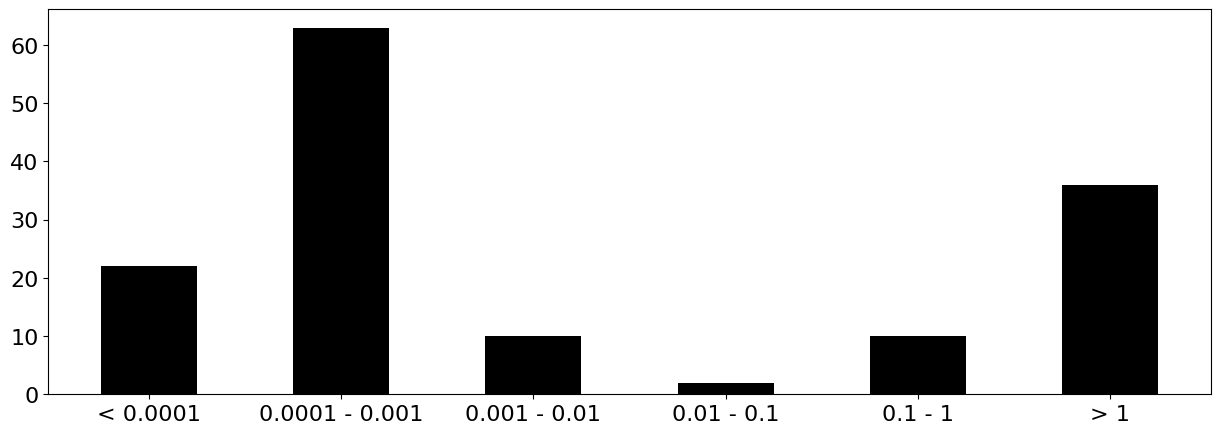

In [80]:
plt.figure(figsize=(15,5))
plt.bar(list(error_dict_categorized.keys()), list(error_dict_categorized.values()), color='k', width=0.5)
